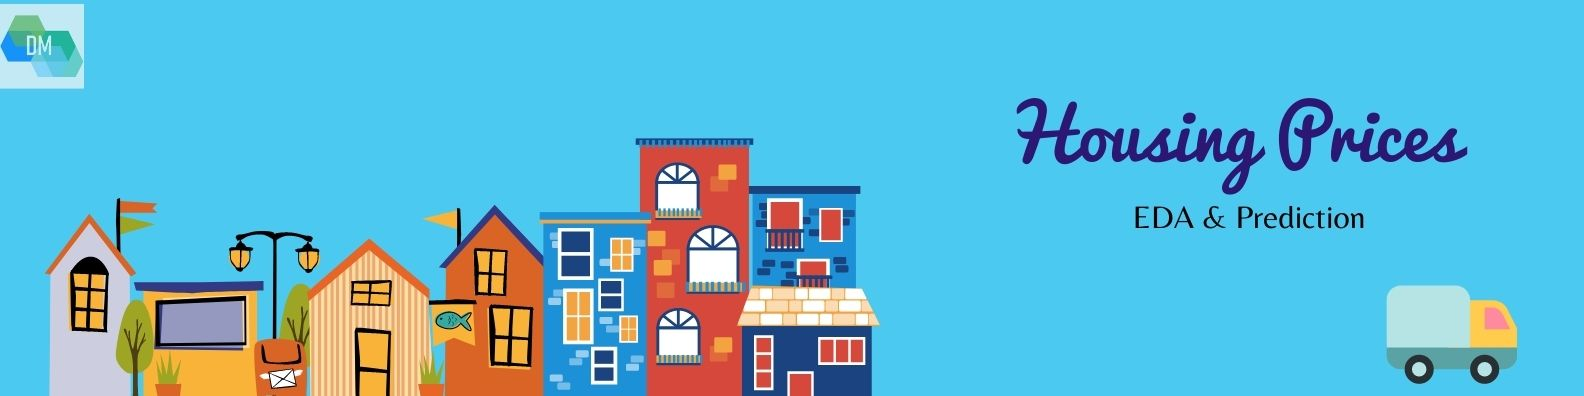

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home. The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

### <h3 style="background-color:#4cc9f0;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing Libraries & Packages 📚 </centre></strong></h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#import time for training details
from time import time
t0 = time()

### <h3 style="background-color:#4cc9f0;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Importing & Reading the dataset 📝 </centre></strong></h3>

In [2]:
# Importing and Reading the Dataset
df_hp_train = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")
df_hp_test = pd.read_csv("../input/house-prices-advanced-regression-techniques/test.csv")

Exploring the dataset

In [3]:
df_hp_train_row_count, df_hp_train_column_count=df_hp_train.shape
print('Total number of rows (train):', df_hp_train_row_count)
print('Total number of columns (train):', df_hp_train_column_count)

df_hp_test_row_count, df_hp_test_column_count=df_hp_test.shape
print('Total number of rows (test):', df_hp_test_row_count)
print('Total number of columns (test):', df_hp_test_column_count)

Total number of rows (train): 1460
Total number of columns (train): 81
Total number of rows (test): 1459
Total number of columns (test): 80


In [4]:
df_hp_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### <h3 style="background-color:#4cc9f0;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Checking for Datatypes & missing values✏️ </centre></strong></h3>

In [5]:
df_hp_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df_hp_train.isna().sum().sort_values(ascending=False)

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

In [7]:
df_hp_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
df_hp_test.isna().sum().sort_values(ascending=False)

PoolQC           1456
MiscFeature      1408
Alley            1352
Fence            1169
FireplaceQu       730
                 ... 
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
SaleCondition       0
Length: 80, dtype: int64

Knowing the % of missing data for each feature will give a better idea and select how to handle missing values before preparing the dataset for the model

In [9]:
# training data
Total_tr = df_hp_train.isnull().sum()
percent_tr = (df_hp_train.isnull().sum() / df_hp_train.isnull().count())
missing_data_tr = pd.concat([Total_tr, round(percent_tr*100, 2)], axis=1, keys=['Total', 'Percent'])

#considering missing data >5%
result_tr=missing_data_tr[percent_tr>0.05] 
result_tr.sort_values('Percent',ascending=False)

,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55


In [10]:
# test data
Total_tt = df_hp_test.isnull().sum()
percent_tt = (df_hp_test.isnull().sum()/df_hp_test.isnull().count())
missing_data_tt = pd.concat([Total_tt, round(percent_tt*100,2)], axis=1, keys=['Total', 'Percent'])

#considering missing data >5%
result_tt=missing_data_tt[percent_tt>0.05]
result_tt.sort_values('Percent',ascending=False)

,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageYrBlt,78,5.35
GarageFinish,78,5.35
GarageQual,78,5.35
GarageCond,78,5.35


11 features have missing data >5%

### <h3 style="background-color:#4cc9f0;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Checking for skewness of the target variable </centre></strong></h3>

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

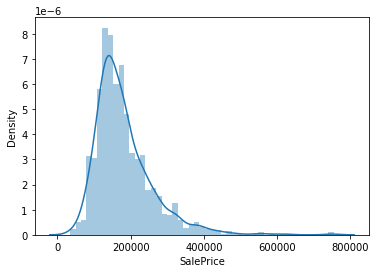

In [11]:
 sns.distplot(df_hp_train['SalePrice'])

The target variable 'SalePrice' seems to be positively skewed. This is undesirable while making predictions. Hence, normalization is required to adjust the skew of this variable

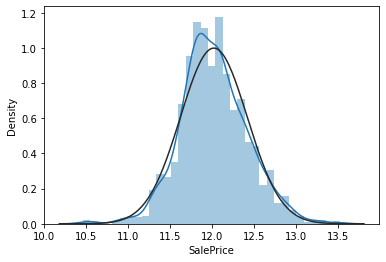

In [12]:
#importing required library and package to fix the skew 
import math
from scipy.stats import norm, skew

df_hp_train['SalePrice'] = np.log1p(df_hp_train['SalePrice'])
sns.distplot(df_hp_train['SalePrice'], fit=norm);

#### After adjusting the skew, next we need to check for correlation of the features with the target variable through a heatmap.

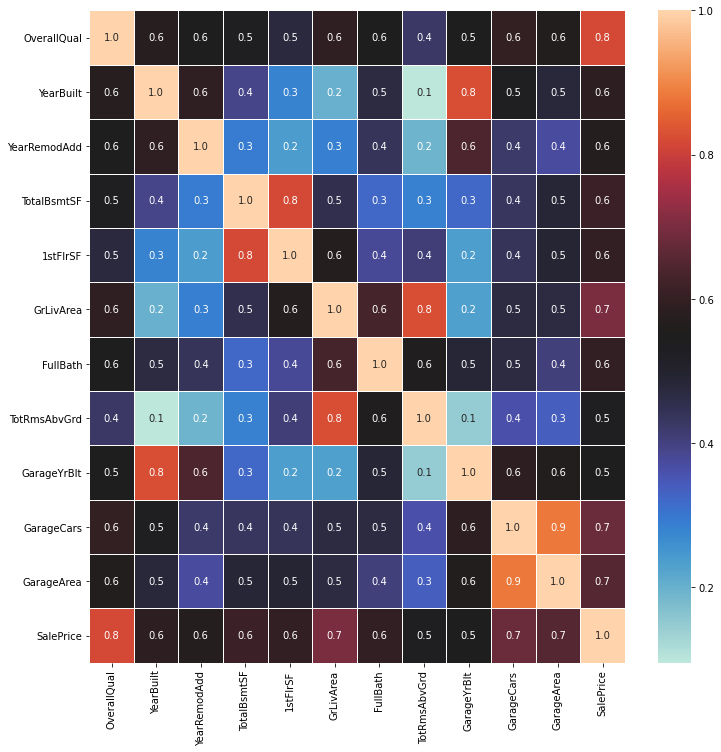

In [13]:
#correlation map
corr = df_hp_train.corr()

# finding highest correlation between features and SalesPrice

highest_corr_features = corr.index[abs(corr["SalePrice"])>0.5] #>0.5 would indicate a stronger correlation
plt.figure(figsize=(12,12))
g = sns.heatmap(df_hp_train[highest_corr_features].corr(),annot=True,linewidths=.5, fmt= '.1f',cmap="icefire")

- This correlation heat map shows that 'OverQual'has highest correlation of 0.8. 
- Similarly,'GarageCars' & 'GarageArea' have a correlation of 0.7 each and they are also sharing a correlation of 0.9 with each other.  
- Next, we can see that, 'TotalBsmtSF' & '1stFlrSF' have a correlation of 0.6 and their correlation with each other is 0.8, which also high. This means, it might be a good idea to add the '1stFlrSF' to  'TotalBsmtSF' for convenience. 
- Finally, 'TotRmsAbvGrd' & 'GrLivArea' each have 0.5 correlation value with the 'SalePrice' and have 0.8 correlation with each other.

In [14]:
# understanding correlation values
round(corr['SalePrice'].sort_values(ascending=False),2)

SalePrice        1.00
OverallQual      0.82
GrLivArea        0.70
GarageCars       0.68
GarageArea       0.65
TotalBsmtSF      0.61
1stFlrSF         0.60
FullBath         0.59
YearBuilt        0.59
YearRemodAdd     0.57
GarageYrBlt      0.54
TotRmsAbvGrd     0.53
Fireplaces       0.49
MasVnrArea       0.43
BsmtFinSF1       0.37
LotFrontage      0.36
WoodDeckSF       0.33
OpenPorchSF      0.32
2ndFlrSF         0.32
HalfBath         0.31
LotArea          0.26
BsmtFullBath     0.24
BsmtUnfSF        0.22
BedroomAbvGr     0.21
ScreenPorch      0.12
PoolArea         0.07
MoSold           0.06
3SsnPorch        0.05
BsmtFinSF2       0.00
BsmtHalfBath    -0.01
Id              -0.02
MiscVal         -0.02
OverallCond     -0.04
YrSold          -0.04
LowQualFinSF    -0.04
MSSubClass      -0.07
KitchenAbvGr    -0.15
EnclosedPorch   -0.15
Name: SalePrice, dtype: float64

### We can now explore the top 5 features that have highest correlation with the 'SalePrice'.

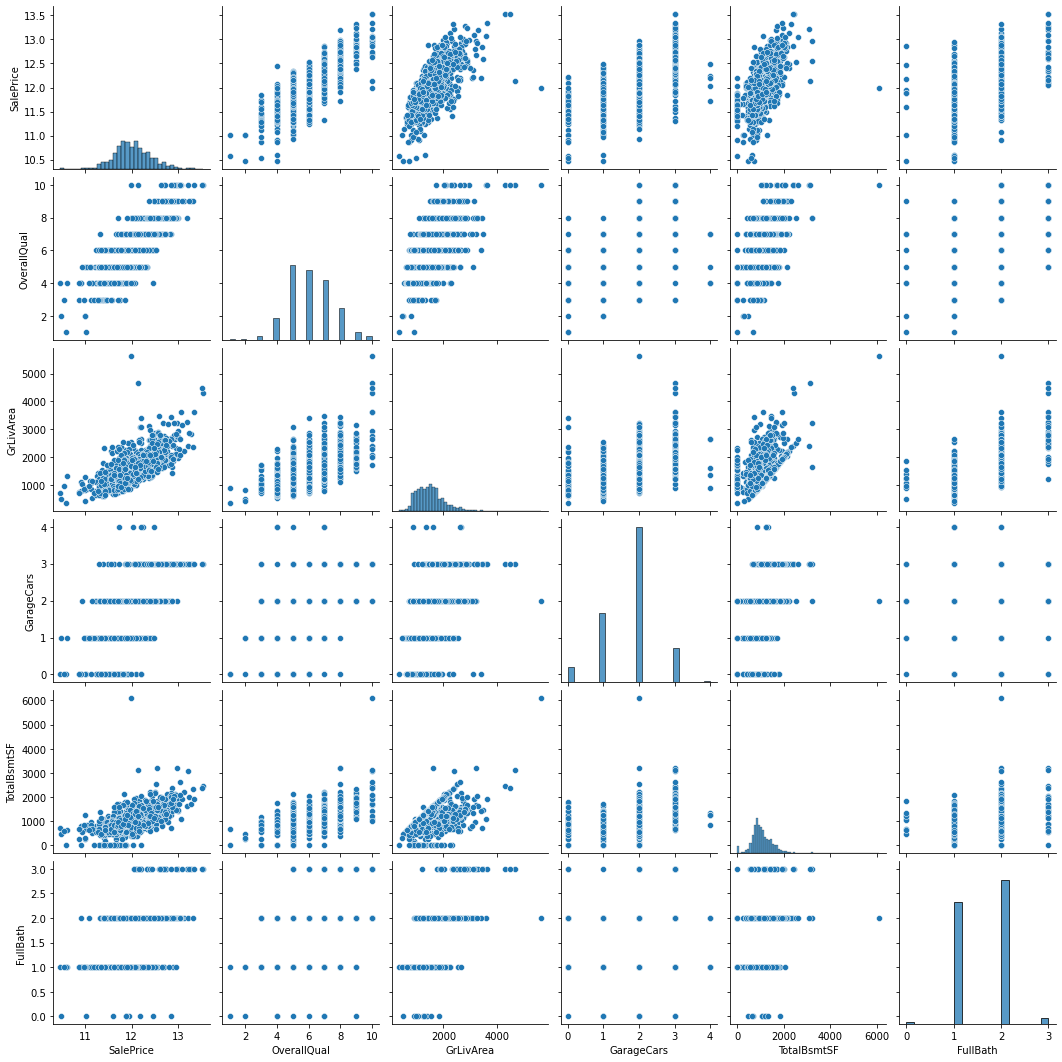

In [15]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath']
sns.pairplot(df_hp_train[cols])

### With these pairplots, we explored all the data. Based on this, we have a good understanding of the important features and their effect on the target variable.

### Handling the Missing Data: 
It might be challenging to work on the missing data in train and test files separately. 
So, for the sake of convenience, we are concatenating the train and test datasets and after preprocessing, we divide them again.

In [16]:
#columns are same, we first separate the SalePrice column from the train dataset

y_train = df_hp_train['SalePrice']

#concatenating the data
df_merge = [df_hp_train, df_hp_test]
merged_data = pd.concat(df_merge, sort=False)

# check the dataset after merge
merged_data.shape

(2919, 81)

In [17]:
#dropping Id and target variable columns
merged_data = merged_data.drop(['Id', 'SalePrice'], axis=1)

# check the dataset again
merged_data.shape

(2919, 79)

### Finding missing values

In [18]:
# total count of missing values for each feature
total = merged_data.isnull().sum().sort_values(ascending=False)

#percentage of missing values for each feature
percent = round((merged_data.isnull().sum() / merged_data.isnull().count())*100,2).sort_values(ascending=False)

# missing values information
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

#considering missing data >5%
result=missing_data[percent>0.05]
result.head(30)

,Total,Percent
PoolQC,2909,99.66
MiscFeature,2814,96.40
Alley,2721,93.22
Fence,2348,80.44
FireplaceQu,1420,48.65
LotFrontage,486,16.65
GarageYrBlt,159,5.45
GarageFinish,159,5.45
GarageQual,159,5.45
GarageCond,159,5.45


None of the above features with missing values are important features as their correlation is not > 0.5 as per the heatmap, so it is possible to delete them without affecting the prediction accuracy.

In [19]:
# drop the columns 
merged_data.drop((missing_data[missing_data['Total'] > 5]).index, axis=1, inplace=True)

In [20]:
# features and total missing values 
total = merged_data.isnull().sum().sort_values(ascending=False)
total.head(30)

MSZoning         4
Functional       2
BsmtFullBath     2
BsmtHalfBath     2
Utilities        2
BsmtFinSF2       1
Exterior2nd      1
GarageCars       1
GarageArea       1
BsmtFinSF1       1
BsmtUnfSF        1
Exterior1st      1
TotalBsmtSF      1
Electrical       1
SaleType         1
KitchenQual      1
HalfBath         0
FullBath         0
BedroomAbvGr     0
KitchenAbvGr     0
MSSubClass       0
TotRmsAbvGrd     0
LowQualFinSF     0
Fireplaces       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
dtype: int64

### Filling the missing data

- We fill the categorical data first and then the numerical data
- Categorical missing values can be easily replaced with the most frequently occuring value i.e. mode
- Numerical missing values can either be replaced by mean or by 0. Since these features do not have a strong correlation with target variable, we replace the missing values with 0

It is also possible to do the same with a SimpleImputer class from scikit-learn but here we use fillna to handle missing values.

In [21]:
# categorical data
cat_missed = ['Electrical','Exterior1st', 'Exterior2nd','KitchenQual','MSZoning','SaleType',]

for value in cat_missed:
    merged_data[value] = merged_data[value].fillna(merged_data[value].mode()[0])
    
# numerical data
num_missed = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','BsmtFullBath','BsmtHalfBath','GarageArea','GarageCars','TotalBsmtSF']

for value in num_missed:
    merged_data[value] = merged_data[value].fillna(0)   

In [22]:
merged_data.isnull().sum().sort_values(ascending=False).iloc[:10]

Utilities       2
Functional      2
MSSubClass      0
Fireplaces      0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

Two categorical columns still have missing values. We replace 'Functional' column missing data with most frequent entry 'Typ' while we replace 'Utilities' with 'AllPub'

In [23]:
#  remaining missing values can be filled with common values for that feature

merged_data['Functional'] = merged_data['Functional'].fillna('Typ')
merged_data['Utilities'] = merged_data['Utilities'].fillna('AllPub')

### Check again to see if there any missing values.

In [24]:
merged_data.isnull().sum().sort_values(ascending=False).iloc[:3]

MSSubClass    0
CentralAir    0
1stFlrSF      0
dtype: int64

Now, all the missing values have been fixed and the dataset is ready for feature engineering.

### <h3 style="background-color:#4c9ff0;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Feature Engineering </centre></strong></h3>

Since we fixed the skew in target variable, we also need to fix the skewness in the other features

In [25]:
#numerical features
numeric_features = merged_data.dtypes[merged_data.dtypes != 'object'].index
skewed_features = merged_data[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
h_skew = skewed_features[abs(skewed_features) > 0.5]
print (h_skew)

MiscVal          21.947195
PoolArea         16.898328
LotArea          12.822431
LowQualFinSF     12.088761
3SsnPorch        11.376065
KitchenAbvGr      4.302254
BsmtFinSF2        4.146143
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931594
OpenPorchSF       2.535114
WoodDeckSF        1.842433
1stFlrSF          1.469604
BsmtFinSF1        1.425230
MSSubClass        1.375457
GrLivArea         1.269358
TotalBsmtSF       1.156894
BsmtUnfSF         0.919339
2ndFlrSF          0.861675
TotRmsAbvGrd      0.758367
Fireplaces        0.733495
HalfBath          0.694566
BsmtFullBath      0.624832
OverallCond       0.570312
YearBuilt        -0.599806
dtype: float64


In [26]:
for value in h_skew.index:
    merged_data[value] = np.log1p(merged_data[value])

merged_data.shape

(2919, 61)

Next, we will add columns 'TotalBsmtSF','1stFlrSF' and '2ndFlrSF' to create a new column 'totalSF' based on the observations from the correlation heatmap.

In [27]:
#new column
merged_data['totalSF'] = merged_data['TotalBsmtSF'] + merged_data['1stFlrSF'] + merged_data['2ndFlrSF']

### Converting the categorical entries to numerical
- This we can achieve easily using the pandas get_dummies() function which replaces categorical columns with their one-hot representations.

In [28]:
# one-hot encoding
merged_data = pd.get_dummies(merged_data)
merged_data.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,9.042040,7,1.791759,7.602900,2003,6.561031,0.0,5.017280,6.753438,...,0,0,0,1,0,0,0,0,1,0
1,3.044522,9.169623,6,2.197225,7.589336,1976,6.886532,0.0,5.652489,7.141245,...,0,0,0,1,0,0,0,0,1,0
2,4.110874,9.328212,7,1.791759,7.601902,2002,6.188264,0.0,6.075346,6.825460,...,0,0,0,1,0,0,0,0,1,0
3,4.262680,9.164401,7,1.791759,7.557995,1970,5.379897,0.0,6.293419,6.629363,...,0,0,0,1,1,0,0,0,0,0
4,4.110874,9.565284,8,1.791759,7.601402,2000,6.486161,0.0,6.196444,7.044033,...,0,0,0,1,0,0,0,0,1,0


Data preprocessing is complete. Next, we need to split the data back to train and test sets.

In [29]:
#Defining train and test datasets

X_train =merged_data[:len(y_train)]
X_test = merged_data[len(y_train):]

X_train.shape,X_test.shape

((1460, 221), (1459, 221))

### <h3 style="background-color:#4cc9f0;color:white;text-align: center;padding-top: 5px;padding-bottom: 5px;border-radius: 15px 50px;"><strong><centre>Applying ML algorithm for prediction 🏘 </centre></strong></h3>

In [30]:
#import required libraries and packages

from sklearn import preprocessing, svm 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 

#linear regression module

regr = LinearRegression() 
regr.fit(X_train, y_train)

train_score = regr.score(X_train, y_train)

#print training score
print("training score: ", train_score)

# making predictions on test data

y_pred=regr.predict(X_test)  
test_score = regr.score(X_test, y_pred)
print("test score:", test_score )

training score:  0.9412353362203868
test score: 1.0


In [31]:
# perform cross-validation

from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer

scorer = make_scorer(mean_squared_error,greater_is_better = False)
def CV_train(data):
    kf = KFold(5,shuffle=True,random_state=42).get_n_splits(x_train.values)
    rmse = np.sqrt(-cross_val_score(model, x_train, y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)
def CV_test(data):
    kf = KFold(5,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model, x_test, y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [32]:
# using XGBoost 

import xgboost as XGB

the_model = XGB.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.01, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1)
the_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.01, max_delta_step=0, max_depth=3,
             min_child_weight=1.7817, missing=nan, monotone_constraints='()',
             n_estimators=2200, n_jobs=4, nthread=-1, num_parallel_tree=1,
             random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
             scale_pos_weight=1, subsample=0.5213, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [33]:
# Predicting SalePrice

y_pred = np.floor(np.expm1(the_model.predict(X_test)))
y_pred

#print predicted values

print("Predicted SalePrice:", y_pred)

Predicted SalePrice: [123097. 160665. 182948. ... 171376. 120775. 229424.]


In [34]:
# generating csv for predicted prices 

pred = pd.DataFrame()

# defining id
test_id = df_hp_test['Id']
pred['Id'] = test_id

pred['SalePrice'] = y_pred
pred.to_csv('predicted_SalePrice.csv',index=False)